In [327]:
import pandas as pd
import matplotlib.pyplot as plt
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from datetime import datetime
from dateutil import parser
from os import remove



In [328]:
#Cargamos el archivo de datos
df_reviews1 = pd.read_parquet('df_reviews1.parquet', engine='fastparquet', index=False)

In [329]:
#Cargamos el archivo de datos
df_items1 = pd.read_parquet('df_items1.parquet', engine='fastparquet', index=False)

In [330]:
#Cargamos el archivo de datos
df_games = pd.read_parquet('df_games.parquet', engine='fastparquet', index=False)

In [331]:
# cargamos el archivo de datos
df_items = pd.read_parquet('df_items.parquet', engine='fastparquet', index=False)

    ANALISIS DE SENTIMIENTOS

In [332]:
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   index        58430 non-null  int64 
 1   funny        58430 non-null  object
 2   posted       58430 non-null  object
 3   last_edited  58430 non-null  object
 4   item_id      58430 non-null  object
 5   helpful      58430 non-null  object
 6   recommend    58430 non-null  bool  
 7   review       58430 non-null  object
dtypes: bool(1), int64(1), object(6)
memory usage: 3.2+ MB


In [333]:
# eliminamos las columnas que no nos sirven
df_reviews1.drop(['funny','last_edited','helpful','index'], axis=1, inplace=True)
df_reviews1

,posted,item_id,recommend,review
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...
...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...
58426,July 8.,362890,True,this game is a perfect remake of the original ...
58427,July 3.,273110,True,had so much fun plaing this and collecting res...
58428,July 20.,730,True,:D


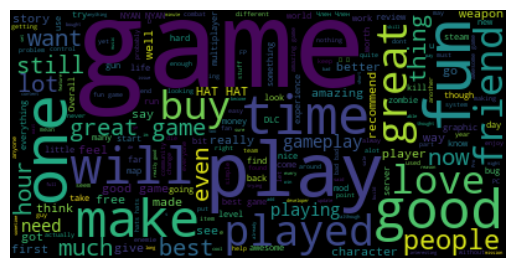

In [334]:
#Creamos la lista de palabras
stopwords = set(STOPWORDS)
stopwords.update(["br", "href"])
texto = " ".join(i for i in df_reviews1.review)
wordcloud = WordCloud(stopwords=stopwords).generate(texto)

plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis("off")
plt.show()

In [335]:
# creamos un función para que TextBlob analice el lenguaje
def sentiment_calc(text):
    try:
        return TextBlob(text).sentiment.polarity
    except:
        return None

#Creamos una columna nueva a la que la aplicamos la función de análisis de sentimientos de TextBlob
df_reviews1['sentiment'] = df_reviews1['review'].apply(sentiment_calc)

In [336]:
# Creamos una funcion para clasificar las opiniones: '2' positivo, '1' neutro y '0' negativo
def clasificar(review):
    if review >= .6: 
        return (2)
    elif review <= 0.1:
        return (0)
    else:
        return (1)

#Creamos la columna sentiment_analisys aplicando la función de clasificaciòn
df_reviews1['sentiment_analisys'] = df_reviews1['sentiment'].apply(clasificar)

In [337]:
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,0.174444,1
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.,0.337500,1
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...,0.114583,1
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,-0.036111,0
...,...,...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...,0.233333,1
58426,July 8.,362890,True,this game is a perfect remake of the original ...,0.142500,1
58427,July 3.,273110,True,had so much fun plaing this and collecting res...,0.087500,0
58428,July 20.,730,True,:D,1.000000,2


In [338]:
# eliminamos espacio al incio en 'posted'
df_reviews1['posted']=df_reviews1['posted'].str.lstrip()
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys
0,"November 5, 2011.",1250,True,Simple yet with great replayability. In my opi...,0.174444,1
1,"July 15, 2011.",22200,True,It's unique and worth a playthrough.,0.337500,1
2,"April 21, 2011.",43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0
3,"June 24, 2014.",251610,True,I know what you think when you see this title ...,0.114583,1
4,"September 8, 2013.",227300,True,For a simple (it's actually not all that simpl...,-0.036111,0
...,...,...,...,...,...,...
58425,July 10.,70,True,a must have classic from steam definitely wort...,0.233333,1
58426,July 8.,362890,True,this game is a perfect remake of the original ...,0.142500,1
58427,July 3.,273110,True,had so much fun plaing this and collecting res...,0.087500,0
58428,July 20.,730,True,:D,1.000000,2


    ANALISIS EXPLORATORIO

In [339]:
# cantidad de comentarios de carga positiva, negativa y neutros
df_reviews1['sentiment_analisys'].groupby(df_reviews1['sentiment_analisys']).filter(lambda x: len(x)).value_counts()

sentiment_analisys
0    32542
1    21908
2     3980
Name: count, dtype: int64

In [340]:
# numero de recomendaciones positivas y negativas
df_reviews1['recommend'].groupby(df_reviews1['recommend']).filter(lambda x: len(x)).value_counts()

recommend
True     51691
False     6739
Name: count, dtype: int64

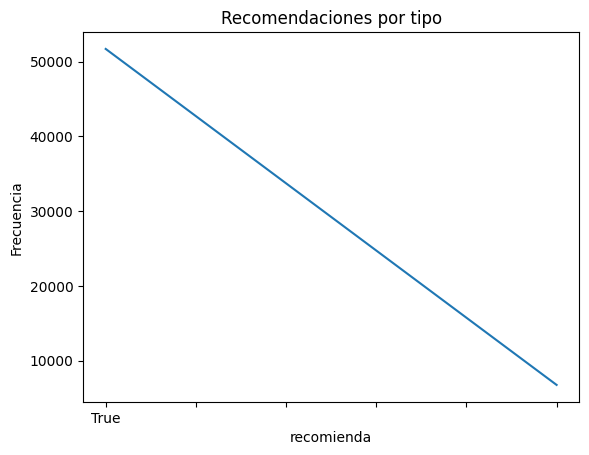

In [341]:
plt.figure()
df_reviews1['recommend'].groupby(df_reviews1['recommend']).filter(lambda x: len(x)).value_counts().plot()
plt.xlabel('recomienda')
plt.ylabel('Frecuencia')
plt.title('Recomendaciones por tipo')
plt.show()

In [342]:
# eliminamos columnas que no no sirven
df_items1.drop(['playtime_2weeks','index'], axis=1, inplace=True)
df_items1

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
1,20,Team Fortress Classic,0
2,30,Day of Defeat,7
3,40,Deathmatch Classic,0
4,50,Half-Life: Opposing Force,0
...,...,...,...
1442047,730,Counter-Strike: Global Offensive,4557
1442048,304930,Unturned,677
1442049,227940,Heroes & Generals,43
1442050,388490,One Way To Die: Steam Edition,3


In [343]:
# cambiamos la fecha que no nos permite reformatear la columna 'posted'
df_reviews1.loc[df_reviews1['posted'] == ' February 29.', 'posted'] = 'February 28'
df_reviews1.loc[df_reviews1['posted'] == 'February 29.', 'posted'] = 'February 28'

In [344]:
# reformateamos la columna posted
fecha = lambda x: parser.parse(x)
fecha_formateada = df_reviews1['posted']
df_reviews1['posted'] = fecha_formateada.apply(fecha)

In [345]:
# creamos una nueva columna con el año en que se creo la reseña 'posted'
df_reviews1['posted_year'] = df_reviews1['posted'].dt.year
df_reviews1

,posted,item_id,recommend,review,sentiment,sentiment_analisys,posted_year
0,2011-11-05,1250,True,Simple yet with great replayability. In my opi...,0.174444,1,2011
1,2011-07-15,22200,True,It's unique and worth a playthrough.,0.337500,1,2011
2,2011-04-21,43110,True,Great atmosphere. The gunplay can be a bit chu...,0.050000,0,2011
3,2014-06-24,251610,True,I know what you think when you see this title ...,0.114583,1,2014
4,2013-09-08,227300,True,For a simple (it's actually not all that simpl...,-0.036111,0,2013
...,...,...,...,...,...,...,...
58425,2023-07-10,70,True,a must have classic from steam definitely wort...,0.233333,1,2023
58426,2023-07-08,362890,True,this game is a perfect remake of the original ...,0.142500,1,2023
58427,2023-07-03,273110,True,had so much fun plaing this and collecting res...,0.087500,0,2023
58428,2023-07-20,730,True,:D,1.000000,2,2023


In [346]:
# eliminamos columnas que no no sirven
df_reviews1.drop(['sentiment','posted','review'], axis=1, inplace=True)
df_reviews1

,item_id,recommend,sentiment_analisys,posted_year
0,1250,True,1,2011
1,22200,True,1,2011
2,43110,True,0,2011
3,251610,True,1,2014
4,227300,True,0,2013
...,...,...,...,...
58425,70,True,1,2023
58426,362890,True,1,2023
58427,273110,True,0,2023
58428,730,True,2,2023


In [347]:
#Juegos con 0 play_time
len(df_items1[df_items1['playtime_forever'] == 0])

10146

In [348]:
# eliminamos los juegos con 0 minutos de juego
df_items1.drop(df_items1[(df_items1['playtime_forever'] ==0)].index, inplace=True)
df_items1

,item_id,item_name,playtime_forever
0,10,Counter-Strike,6
2,30,Day of Defeat,7
8,300,Day of Defeat: Source,4733
9,240,Counter-Strike: Source,1853
10,3830,Psychonauts,333
...,...,...,...
1442047,730,Counter-Strike: Global Offensive,4557
1442048,304930,Unturned,677
1442049,227940,Heroes & Generals,43
1442050,388490,One Way To Die: Steam Edition,3


In [349]:
# cantidad de titulos de juegos en el df
df_games.title.nunique()

22513

In [350]:
# renombramos la columna id para poder hacer merge con df_items1 y eliminamos las columnas que no usaremos
df_games.rename(columns={'id': 'item_id'}, inplace=True)
df_games.drop(['index','publisher','app_name','url','specs','early_access','developer'], axis=1, inplace=True)
df_games

,genres,title,release_date,tags,reviews_url,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,670290
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,767400
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,772540
...,...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,745400
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,773640
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,733530
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,610660


In [351]:
# elimino las filas que contienen datos que no nos sirven y que no se pueden cambiar a dt
df_games.drop(df_games[(df_games['release_date'] == 'SOON™')].index, inplace=True)
df_games.drop(df_games[(df_games['release_date'] == 'SOON')].index, inplace=True)

In [352]:
# convertimos relese_date a formato datetime
df_games['release_date'] = pd.to_datetime(df_games['release_date'], format ='mixed')

In [353]:
df_games

,genres,title,release_date,tags,reviews_url,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,761140
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,643980
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,670290
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,767400
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,772540
...,...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,745400
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,773640
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,733530
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,610660


In [354]:
# extraemos el año de lanzamiento para ponerlo en una nueva columna
df_games['release_year'] = df_games['release_date'].dt.year
df_games

,genres,title,release_date,tags,reviews_url,item_id,release_year
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,2018-01-04,"[Strategy, Action, Indie, Casual, Simulation]",http://steamcommunity.com/app/761140/reviews/?...,761140,2018
1,"[Free to Play, Indie, RPG, Strategy]",Ironbound,2018-01-04,"[Free to Play, Strategy, Indie, RPG, Card Game...",http://steamcommunity.com/app/643980/reviews/?...,643980,2018
2,"[Casual, Free to Play, Indie, Simulation, Sports]",Real Pool 3D - Poolians,2017-07-24,"[Free to Play, Simulation, Sports, Casual, Ind...",http://steamcommunity.com/app/670290/reviews/?...,670290,2017
3,"[Action, Adventure, Casual]",弹炸人2222,2017-12-07,"[Action, Adventure, Casual]",http://steamcommunity.com/app/767400/reviews/?...,767400,2017
4,"[Action, Adventure, Simulation]",Battle Royale Trainer,2018-01-04,"[Action, Adventure, Simulation, FPS, Shooter, ...",http://steamcommunity.com/app/772540/reviews/?...,772540,2018
...,...,...,...,...,...,...,...
22525,"[Action, Adventure, Casual, Indie]",Kebab it Up!,2018-01-04,"[Action, Indie, Casual, Violent, Adventure]",http://steamcommunity.com/app/745400/reviews/?...,745400,2018
22526,"[Casual, Indie, Simulation, Strategy]",Colony On Mars,2018-01-04,"[Strategy, Indie, Casual, Simulation]",http://steamcommunity.com/app/773640/reviews/?...,773640,2018
22527,"[Casual, Indie, Strategy]",LOGistICAL: South Africa,2018-01-04,"[Strategy, Indie, Casual]",http://steamcommunity.com/app/733530/reviews/?...,733530,2018
22528,"[Indie, Racing, Simulation]",Russian Roads,2018-01-04,"[Indie, Simulation, Racing]",http://steamcommunity.com/app/610660/reviews/?...,610660,2018


In [355]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_games
df_items1["item_id"] = df_items1["item_id"].astype(str).astype(int)
df_items1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1431906 entries, 0 to 1442051
Data columns (total 3 columns):
 #   Column            Non-Null Count    Dtype 
---  ------            --------------    ----- 
 0   item_id           1431906 non-null  int64 
 1   item_name         1431906 non-null  object
 2   playtime_forever  1431906 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 43.7+ MB


In [356]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_items1
df_games["item_id"] = df_games["item_id"].astype(str).astype(int)
df_games.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22528 entries, 0 to 22529
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   genres        22528 non-null  object        
 1   title         22528 non-null  object        
 2   release_date  22528 non-null  datetime64[ns]
 3   tags          22528 non-null  object        
 4   reviews_url   22528 non-null  object        
 5   item_id       22528 non-null  int64         
 6   release_year  22528 non-null  int32         
dtypes: datetime64[ns](1), int32(1), int64(1), object(4)
memory usage: 1.3+ MB


In [357]:
df_games_items = pd.merge(df_games, df_items1, on='item_id')
df_games_items

,genres,title,release_date,tags,reviews_url,item_id,release_year,item_name,playtime_forever
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,12
...,...,...,...,...,...,...,...,...,...
1184017,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847
1184018,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096
1184019,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556
1184020,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126


In [358]:
# creamo una nueva columna con playtime_forever convertido a horas jugadas
df_games_items['playtime_hours'] = df_games_items['playtime_forever'] / (60)
df_games_items

,genres,title,release_date,tags,reviews_url,item_id,release_year,item_name,playtime_forever,playtime_hours
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5,0.083333
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13,0.216667
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110,1.833333
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8,0.133333
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,12,0.200000
...,...,...,...,...,...,...,...,...,...,...
1184017,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847,14.116667
1184018,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096,101.600000
1184019,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556,9.266667
1184020,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126,18.766667


In [359]:
df_games_items.rename(columns={'reviews_url': 'user_url'}, inplace=True)
df_games_items

,genres,title,release_date,tags,user_url,item_id,release_year,item_name,playtime_forever,playtime_hours
0,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,5,0.083333
1,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,13,0.216667
2,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,110,1.833333
3,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,8,0.133333
4,"[Action, Indie, Racing]",Carmageddon Max Pack,1997-06-30,"[Racing, Action, Classic, Indie, Gore, 1990's,...",http://steamcommunity.com/app/282010/reviews/?...,282010,1997,Carmageddon Max Pack,12,0.200000
...,...,...,...,...,...,...,...,...,...,...
1184017,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,847,14.116667
1184018,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,6096,101.600000
1184019,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,556,9.266667
1184020,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,1126,18.766667


In [360]:
# eliminamos los juegos con 200 horas o menos de tiempo jugado para acortar el dataframe. Los valores mas altos se encuentra muy por debajo de este rango 
df_games_items.drop(df_games_items[(df_games_items['playtime_hours'] <=200)].index, inplace=True)
df_games_items

,genres,title,release_date,tags,user_url,item_id,release_year,item_name,playtime_forever,playtime_hours
365,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,13697,228.283333
542,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,19113,318.550000
864,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,76899,1281.650000
1089,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,12022,200.366667
1166,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,24271,404.516667
...,...,...,...,...,...,...,...,...,...,...
1183904,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,117120,1952.000000
1183915,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,40241,670.683333
1183935,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,44149,735.816667
1183939,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,21562,359.366667


In [361]:
# ordenamos generos por may tiempo de juego
df_funcion1 = df_games_items.sort_values(by = 'playtime_hours', ascending = False)[['genres','release_year','playtime_hours']]
df_funcion1.reset_index (drop = True , inplace = True )
df_funcion1

,genres,release_year,playtime_hours
0,"[Indie, Simulation]",2006,10712.883333
1,"[Action, Adventure, Casual, Free to Play, Mass...",2012,10588.250000
2,"[Indie, Simulation]",2006,10223.516667
3,"[Indie, Simulation]",2006,9195.316667
4,"[Action, Free to Play, Massively Multiplayer, ...",2003,8848.033333
...,...,...,...
65493,"[Indie, Simulation]",2006,200.016667
65494,[Action],2012,200.016667
65495,"[Action, RPG]",2009,200.016667
65496,"[Action, Adventure, Casual, Free to Play, Mass...",2015,200.016667


In [362]:
# guardamos el dataframe para la funcion
df_funcion1.to_parquet('df_funcion1.parquet', engine='auto', compression='snappy')


In [363]:
users = pd.merge(df_games_items, df_items, how='outer')
users.drop(users.columns[[0,1,2,4,5,6,7,8,10,11]], axis='columns', inplace=True)
users

,tags,playtime_hours,items_count,steam_id
0,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",228.283333,NaN,NaN
1,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",318.550000,NaN,NaN
2,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",1281.650000,NaN,NaN
3,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",200.366667,NaN,NaN
4,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",404.516667,NaN,NaN
...,...,...,...,...
153146,NaN,NaN,22.0,76561198323066619
153147,NaN,NaN,177.0,76561198326700687
153148,NaN,NaN,0.0,76561198328759259
153149,NaN,NaN,7.0,76561198329548331


In [364]:
# eliminamos nulos
users.dropna(inplace=True)
users

,tags,playtime_hours,items_count,steam_id


In [365]:
df_funcion2 = df_games_items.sort_values(by = 'playtime_hours', ascending=False)[['genres','user_url','playtime_hours']]
df_funcion2

,genres,user_url,playtime_hours
6830,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,10712.883333
230059,"[Action, Adventure, Casual, Free to Play, Mass...",http://steamcommunity.com/app/212200/reviews/?...,10588.250000
10518,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,10223.516667
4837,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,9195.316667
1046146,"[Action, Free to Play, Massively Multiplayer, ...",http://steamcommunity.com/app/8500/reviews/?br...,8848.033333
...,...,...,...
10335,"[Indie, Simulation]",http://steamcommunity.com/app/4000/reviews/?br...,200.016667
207701,[Action],http://steamcommunity.com/app/730/reviews/?bro...,200.016667
1095352,"[Action, RPG]",http://steamcommunity.com/app/8980/reviews/?br...,200.016667
607587,"[Action, Adventure, Casual, Free to Play, Mass...",http://steamcommunity.com/app/304050/reviews/?...,200.016667


In [366]:
df_funcion2.to_parquet('df_funcion2.parquet', engine='auto', compression='snappy')

In [367]:
# cambiamos el tipo de dato de la columna item_id para poder hacer merge con df_items1
df_reviews1["item_id"] = df_reviews1["item_id"].astype(str).astype(int)
df_reviews1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58430 entries, 0 to 58429
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   item_id             58430 non-null  int64
 1   recommend           58430 non-null  bool 
 2   sentiment_analisys  58430 non-null  int64
 3   posted_year         58430 non-null  int32
dtypes: bool(1), int32(1), int64(2)
memory usage: 1.2 MB


In [368]:
# creamos un nuevo dataframe para poder revisar los juegos mas jugados
df_items_reviews1 = pd.merge(df_reviews1,df_items1)
df_items_reviews1

,item_id,recommend,sentiment_analisys,posted_year,item_name,playtime_forever
0,1250,True,1,2011,Killing Floor,10006
1,1250,True,1,2011,Killing Floor,428
2,1250,True,1,2011,Killing Floor,1646
3,1250,True,1,2011,Killing Floor,3546
4,1250,True,1,2011,Killing Floor,16435
...,...,...,...,...,...,...
271616994,431510,True,1,2023,Mystic Destinies: Serendipity of Aeons,28
271616995,431510,True,1,2023,Mystic Destinies: Serendipity of Aeons,20
271616996,431510,True,1,2023,Mystic Destinies: Serendipity of Aeons,37
271616997,431510,True,1,2023,Mystic Destinies: Serendipity of Aeons,3


In [369]:
# filtramos por juegos que estan recomendados 'True'
recomendados = df_items_reviews1[df_items_reviews1.recommend ==True]

In [370]:
# agrupamos y contamos los datos para la funcion 3
df_funcion3 = recomendados.groupby(['posted_year','item_name'])['recommend'].count()
# ordenamos de mayor a menor
df_funcion3 = df_funcion3.sort_values(ascending=False)


In [371]:
# convertimos a dataframe y reseteamos indice 
df_funcion3 = pd.DataFrame(df_funcion3)
df_funcion3 = df_funcion3.reset_index()
df_funcion3

,posted_year,item_name,recommend
0,2015,Counter-Strike: Global Offensive,42766689
1,2014,Counter-Strike: Global Offensive,29911476
2,2023,Counter-Strike: Global Offensive,17868466
3,2014,Garry's Mod,14323954
4,2015,Garry's Mod,6755154
...,...,...,...
5704,2023,Call of Duty: Black Ops III - Awakening DLC Pack,1
5705,2015,AGFPROV3 Premium,1
5706,2023,Technolust,1
5707,2012,Westward,1


In [372]:
# guardamos el archivo para la funcion
df_funcion3.to_parquet('df_funcion3.parquet', engine='auto', compression='snappy')

In [373]:
# filtramos por juegos recomendados como 'False'
no_recomendados = df_items_reviews1[df_items_reviews1.recommend ==False]

In [374]:
# agrugamos y contamos los datos para la funcion 4
df_funcion4 = no_recomendados.groupby(['posted_year','item_name'])['recommend'].count()
# ordenamos de mayor a menor
df_funcion4 = df_funcion4.sort_values(ascending=False)
df_funcion4

posted_year  item_name                       
2015         Counter-Strike: Global Offensive    3612903
2023         Counter-Strike: Global Offensive    2548637
2014         Counter-Strike: Global Offensive    1512378
2015         PAYDAY 2                            1443000
             Rust                                 376658
                                                  ...   
2023         The Rebel                                 1
             VR Gallery                                1
2015         Avaris 2                                  1
             World of Subways 1 – The Path             1
             Fury Of The Gods                          1
Name: recommend, Length: 2208, dtype: int64

In [375]:
# convertimos a dataframe y reseteamos indice 
df_funcion4 = pd.DataFrame(df_funcion4)
df_funcion4 = df_funcion4.reset_index()
df_funcion4

,posted_year,item_name,recommend
0,2015,Counter-Strike: Global Offensive,3612903
1,2023,Counter-Strike: Global Offensive,2548637
2,2014,Counter-Strike: Global Offensive,1512378
3,2015,PAYDAY 2,1443000
4,2015,Rust,376658
...,...,...,...
2203,2023,The Rebel,1
2204,2023,VR Gallery,1
2205,2015,Avaris 2,1
2206,2015,World of Subways 1 – The Path,1


In [376]:
# guardamos el archivo para la funcion
df_funcion4.to_parquet('df_funcion4.parquet', engine='auto', compression='snappy')

In [377]:
df_games_items

,genres,title,release_date,tags,user_url,item_id,release_year,item_name,playtime_forever,playtime_hours
365,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,13697,228.283333
542,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,19113,318.550000
864,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,76899,1281.650000
1089,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,12022,200.366667
1166,[Action],Half-Life,1998-11-08,"[FPS, Classic, Action, Sci-fi, Singleplayer, S...",http://steamcommunity.com/app/70/reviews/?brow...,70,1998,Half-Life,24271,404.516667
...,...,...,...,...,...,...,...,...,...,...
1183904,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,117120,1952.000000
1183915,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,40241,670.683333
1183935,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,44149,735.816667
1183939,[Action],Counter-Strike: Condition Zero,2004-03-01,"[Action, FPS, Shooter, Multiplayer, Singleplay...",http://steamcommunity.com/app/80/reviews/?brow...,80,2004,Counter-Strike: Condition Zero,21562,359.366667


In [378]:
# numero de juegos totales que quedaron en el df. Todos son juegos que tienen mas de 200 horas jugados 
df_games_items.title.nunique()

937

In [379]:
# creamos un nuevo dataframe recortado con los titulos y etiquetas de cada titulo para hacer un sistema de recomendacion sencillo con esos datos
df_recomendacion = df_games_items[['title', 'tags']].copy()
df_recomendacion = df_recomendacion.loc[df_recomendacion.astype(str).drop_duplicates().index]
df_recomendacion


,title,tags
365,Half-Life,"[FPS, Classic, Action, Sci-fi, Singleplayer, S..."
2757,DEFCON,"[Strategy, Indie, Multiplayer, Wargame, Cold W..."
3300,Garry's Mod,"[Sandbox, Multiplayer, Funny, Moddable, Buildi..."
22226,RACE - The WTCC Game,"[Racing, Simulation]"
22661,FlatOut 2™,"[Racing, Destruction, Multiplayer, Great Sound..."
...,...,...
1181616,Deathmatch Classic,"[Action, FPS, Multiplayer, Classic, Shooter, F..."
1181970,Half-Life: Blue Shift,"[FPS, Action, Sci-fi, Singleplayer, Shooter, A..."
1182384,Day of Defeat,"[FPS, World War II, Multiplayer, Action, Shoot..."
1182724,Unreal Tournament 2004: Editor's Choice Edition,"[FPS, Arena Shooter, Action, Classic, Multipla..."


In [380]:
# desanidamos la columna tags
df_recomendacion = df_recomendacion.explode('tags')

In [381]:
df_recomendacion

,title,tags
365,Half-Life,FPS
365,Half-Life,Classic
365,Half-Life,Action
365,Half-Life,Sci-fi
365,Half-Life,Singleplayer
...,...,...
1183253,Counter-Strike: Condition Zero,Survival
1183253,Counter-Strike: Condition Zero,Atmospheric
1183253,Counter-Strike: Condition Zero,Dark
1183253,Counter-Strike: Condition Zero,Simulation


In [382]:
df_recomendacion.to_csv('df_recomendacion.csv', index=False)

In [ ]:
#borramos los archivos que no usaremos
remove("df_games.parquet")
remove("df_items.parquet")
remove("df_items1.parquet")
remove("df_reviews.parquet")
remove("df_reviews1.parquet")
remove("df_games_items.parquet")